In [1]:
#This imports the relevant dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as st
import seaborn as sns

In [2]:
#This brings in the top 100 employers list
filename = "employers_clean.csv"
employers_df=pd.read_csv(filename)

In [3]:
employers_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino


In [4]:
#This removes the companies without a ticker code
employers_reduced = employers_df[employers_df["TICKER"] != 'none'].reset_index(drop=True)

In [5]:
#This displays the listed companies
employers_reduced.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino


In [6]:
#This adds new columns for the data that will be brought in using Yfinance
employers_reduced['1 year stock performance']=""
employers_reduced['return on equity']=""
employers_reduced['Analyst Recommendation Mean']=""
employers_reduced['Operating Income']=""


employers_reduced

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,,,,
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,,,,
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,,,,
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,,,,
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,,,,
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,,,,
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,,,,
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,,,,


In [21]:
#This sets up a loop through the rows in the table and searchs each company on its ticker code
#The relevant information is added to the empty columns.
#It also prints the company information to the screen.
#If any of the data is missing, the loop returns "No data found"

print('Finding stock data..')
print("-"*20)
for index,row in employers_reduced.iterrows():
    company=employers_reduced.loc[index,'NAME']
    ticker=employers_reduced.loc[index,'TICKER']
    stock_data=yf.Ticker(ticker)
    try:
        employers_reduced.loc[index, "1 year stock performance"]=round(stock_data.info["52WeekChange"]*100,2)
        employers_reduced.loc[index, "return on equity"]=round(stock_data.info["returnOnEquity"]*100,2)
        employers_reduced.loc[index, "Analyst Recommendation Mean"]=stock_data.info['recommendationMean']
        employers_reduced.loc[index, 'Operating Income']=stock_data.info['ebitda']
    except:
        employers_reduced.loc[index, "1 year stock performance"]="No data found"
        employers_reduced.loc[index, "return on equity"]="No data found"
        employers_reduced.loc[index, "Analyst Recommendation Mean"]="No data found"
        employers_reduced.loc[index, "Operating Income"]="No data found"
        
    print(f"{company} ({ticker}): {employers_reduced.loc[index, '1 year stock performance']}% 1yr stock performance; {employers_reduced.loc[index, 'return on equity']}% RoE; Mean Analyst Rec: {employers_reduced.loc[index, 'Analyst Recommendation Mean']}; EBITDA: {employers_reduced.loc[index, 'Operating Income']}")
    print("-"*20)

employers_reduced

Finding stock data..
--------------------
Samsung Electronics (005930.KS): -13.01% 1yr stock performance; 16.87% RoE; Mean Analyst Rec: 1.8; EBITDA: 79330000502784
--------------------
Microsoft (MSFT): -14.16% 1yr stock performance; 39.31% RoE; Mean Analyst Rec: 1.8; EBITDA: 97945001984
--------------------
IBM (IBM): -0.22% 1yr stock performance; 8.69% RoE; Mean Analyst Rec: 2.5; EBITDA: 6428000256
--------------------
Alphabet (GOOG): -24.27% 1yr stock performance; 23.62% RoE; Mean Analyst Rec: 1.5; EBITDA: 90770997248
--------------------
Apple (AAPL): -10.0% 1yr stock performance; 147.94% RoE; Mean Analyst Rec: 2; EBITDA: 125287997440
--------------------
Delta Air Lines (DAL): -3.32% 1yr stock performance; 25.49% RoE; Mean Analyst Rec: 1.7; EBITDA: 5900999680
--------------------
Costco Wholesale (COST): -0.21% 1yr stock performance; 29.32% RoE; Mean Analyst Rec: 2.1; EBITDA: 9648000000
--------------------
Adobe (ADBE): -25.2% 1yr stock performance; 32.97% RoE; Mean Analyst Rec:

Volvo Group (VOLCAR-B.ST): -19.37% 1yr stock performance; 17.51% RoE; Mean Analyst Rec: None; EBITDA: 26701000704
--------------------
Alibaba Group (BABA): -7.39% 1yr stock performance; -0.12% RoE; Mean Analyst Rec: 1.9; EBITDA: 146090000384
--------------------
Intel (INTC): -37.07% 1yr stock performance; 8.07% RoE; Mean Analyst Rec: 3.2; EBITDA: 15370999808
--------------------
Viatris (VTRS): -20.18% 1yr stock performance; 3.99% RoE; Mean Analyst Rec: 2.5; EBITDA: 5998499840
--------------------
Mitsubishi Electric (8058.T): 8.73% 1yr stock performance; 17.49% RoE; Mean Analyst Rec: 2; EBITDA: 1406378967040
--------------------
Pirelli (PIRC.MI): -20.14% 1yr stock performance; 8.42% RoE; Mean Analyst Rec: 1.9; EBITDA: 1228393984
--------------------
Enel (ENEL.MI): -16.62% 1yr stock performance; 6.64% RoE; Mean Analyst Rec: 2.1; EBITDA: 14380000256
--------------------
Naver (035420.KS): -35.32% 1yr stock performance; 3.47% RoE; Mean Analyst Rec: 2; EBITDA: 1706498850816
----------

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,-13.01,16.87,1.8,79330000502784
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,-14.16,39.31,1.8,97945001984
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,-0.22,8.69,2.5,6428000256
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,-24.27,23.62,1.5,90770997248
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,-10.0,147.94,2,125287997440
...,...,...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,No data found,No data found,No data found,No data found
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,-0.59,144.03,1.9,13436999680
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,43.16,-6.42,2.8,7233999872
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,-18.81,26.71,3.2,2274543104


In [22]:
#This drops any companies with no data found.
employers_reduced["Operating Income"].astype(str)
employers_filter=employers_reduced.dropna(axis=0,how='any')
employers_filter=employers_filter.loc[employers_filter['1 year stock performance']!= "No data found"]
employers_filter["EMPLOYEES"]=employers_filter["EMPLOYEES"].str.replace(',', '').astype(int)

employers_filter.head(26)



,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,-13.01,16.87,1.8,79330000502784
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,-14.16,39.31,1.8,97945001984
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,-0.22,8.69,2.5,6428000256
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,-24.27,23.62,1.5,90770997248
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,-10.0,147.94,2,125287997440
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,80000,4.2,Atlanta,-3.32,25.49,1.7,5900999680
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,288000,4.0,Issaquah,-0.21,29.32,2.1,9648000000
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,25988,4.4,San Jose,-25.2,32.97,2.2,6716000256
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,55093,4.4,Dallas,-18.5,5.11,2.1,2436000000
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,133000,4.3,Round Rock,-28.36,33.01,2.1,9059999744


In [24]:
#This sets up variables to be used in the plots below.
stock = employers_filter['1 year stock performance'].astype(float)
stock_z=st.zscore(stock)

roe= employers_filter['return on equity'].astype(float)
roe_z=st.zscore(roe)

analyst=employers_filter['Analyst Recommendation Mean'].astype(float)
analyst_z=st.zscore(analyst)

In [25]:
#This sets up variables to be used in the plots below.
rank=employers_filter["RANK"]
glassdoor=employers_filter["Glassdoor Rating"]
rec=employers_filter["Analyst Recommendation Mean"]
stock=employers_filter["1 year stock performance"]


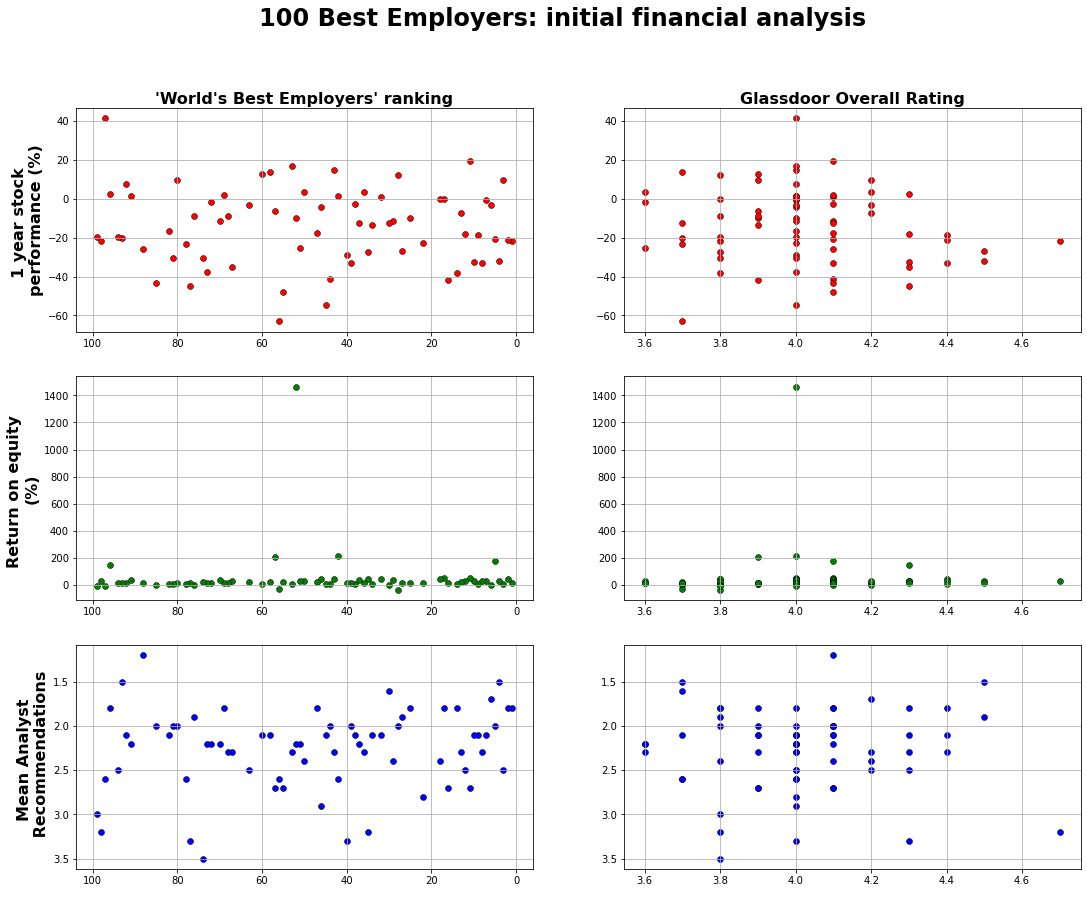

In [21]:
#This creates plt subplots for the financial metrics against the employer data
fig,axes=plt.subplots(3,2, figsize=(18,14))
fig.suptitle('100 Best Employers: initial financial analysis', size=24, weight='bold')

ax1=sns.scatterplot(ax=axes[0,0], data=employers_filter, x='RANK',y='1 year stock performance',color='red',edgecolor="black")
axes[0,0].invert_xaxis()
axes[0,0].set_ylabel('1 year stock \nperformance (%)',fontsize = 16, weight='bold')
axes[0,0].set_xlabel("'World's Best Employers' ranking",fontsize = 16, weight='bold')
axes[0,0].xaxis.set_label_position('top') 
axes[0,0].grid()

sns.scatterplot(ax=axes[0,1], data=employers_filter, x='Glassdoor Rating',y='1 year stock performance',color='red',edgecolor="black")
axes[0,1].set_ylabel(' ',fontsize = 16)
axes[0,1].set_xlabel("Glassdoor Overall Rating",fontsize = 16, weight='bold')
axes[0,1].xaxis.set_label_position('top') 
axes[0,1].grid()

sns.scatterplot(ax=axes[1,0], data=employers_filter, x='RANK',y='return on equity',color='green',edgecolor="black")
axes[1,0].invert_xaxis()
axes[1,0].set_ylabel('Return on equity \n(%)',fontsize = 16, weight='bold')
axes[1,0].set_xlabel(" ",fontsize = 16)
axes[1,0].grid()

sns.scatterplot(ax=axes[1,1], data=employers_filter, x='Glassdoor Rating',y='return on equity',color='green',edgecolor="black")
axes[1,1].set_ylabel(' ',fontsize = 16)
axes[1,1].set_xlabel(" ",fontsize = 16)
axes[1,1].grid()

sns.scatterplot(ax=axes[2,0], data=employers_filter, x='RANK',y='Analyst Recommendation Mean',color='blue',edgecolor="black")
axes[2,0].invert_xaxis()
axes[2,0].invert_yaxis()
axes[2,0].set_ylabel('Mean Analyst \n Recommendations',fontsize = 16, weight='bold')
axes[2,0].set_xlabel(" ",fontsize = 16)
axes[2,0].grid()

sns.scatterplot(ax=axes[2,1], data=employers_filter, x='Glassdoor Rating',y='Analyst Recommendation Mean',color='blue',edgecolor="black")
axes[2,1].set_ylabel(' ',fontsize = 16)
axes[2,1].invert_yaxis()
axes[2,1].set_xlabel(" ",fontsize = 16)
axes[2,1].grid()
# sns.scatterplot(ax=axes[3,0], data=employers_filter, x='RANK',y='Operating income per employee',color='blue',edgecolor="black")
# axes[3,0].invert_xaxis()
# axes[3,0].set_ylabel('Op. income per \n employee ($)',fontsize = 16, weight='bold')
# axes[3,0].set_xlabel(" ",fontsize = 16)


# sns.scatterplot(ax=axes[3,1], data=employers_filter, x='Glassdoor Rating',y='Operating income per employee',color='blue',edgecolor="black")
# axes[3,1].set_ylabel(" ",fontsize = 16)
# axes[3,1].set_xlabel(" ",fontsize = 16)

plt.show()
# plt.savefig('Images/Yfinance_scatter.png')


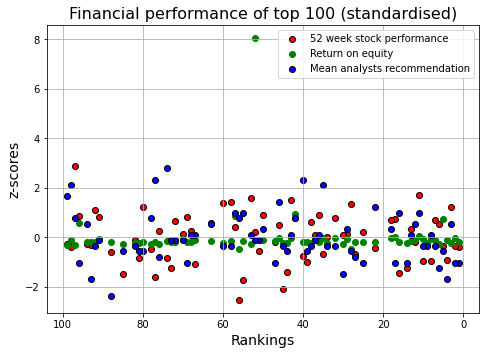

In [13]:
#This produces a standardised plot of financial performance.
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax1=ax.scatter(rank,stock_z,color='Red',label='52 week stock performance',edgecolor="black")
ax2=ax.scatter(rank,roe_z,color='green',label='Return on equity')
ax3=ax.scatter(rank,analyst_z,color='blue',label="Mean analysts recommendation",edgecolor="black")
# ax4=ax.scatter(rank,op_emp_z,color='blue',label="Operating income per employee")
ax.legend(handles=[ax1,ax2,ax3],prop={'size':10})
ax.set_xlabel("Rankings", size=14)
ax.set_ylabel("z-scores", size=14)
ax.set_title("Financial performance of top 100 (standardised)",size=16)
ax.invert_xaxis()
plt.grid()
plt.show()
# plt.savefig('Images/fin_perf_std.png')